# Hey Everyone! Here's my progress in learning Tensorflow and practicing Machine Learning. **Part 1**


**Follow my journey on social media:** [Podcast](https://open.spotify.com/show/6FxUBKO4bqwRWsjAIGZMwz) | [Twitter](https://twitter.com/tlkdata2me) | [Instagram](https://www.instagram.com/tlkdata2me/) | [LinkedIn](https://www.linkedin.com/in/shecananalyze/) 

Learning Source: [Click here to take freeCodeCamp's TensorFlow 2.0 Complete Course](https://www.youtube.com/watch?v=tPYj3fFJGjk)

# Intro to Tensorflow
Vector - A **tensor** is a **vector** of a number (n) of dimensions that represent all types of data which are represented in *shapes.*

Shapes - The dimension of the data being represented. (EX 2 rows 2 Columns)

**Graphs and Sessions**
- Graph - Set of computations that take place one after the other
- Session - At this point I believe sessions are components from the graph (I will update this upon understanding)

**Types of Tensors**
- Variable - Right now I understand that variables can't be changed. (Immutable) 

In [0]:
# Here I will practice changing shapes in Tensor Flow. 
%tensorflow_version 2.x
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [0]:
# Video Example (We Do)
#Here I created a tensor of 0's with the shape of 5 sets of 5 arrays 5 rows with 5 columns
t = tf.zeros([5,5,5,5]) 
#print(t)
#Reshapes the tensor with 625 elements (elements are the number 0 in this case)
t = tf.reshape(t,[625]) 
#print(t)
#Reshapes the tensor with 125 rows (using -1 will create the amoun of columns needed to complete the task)
t = tf.reshape(t,[125, -1]) 
#print(t)

In [0]:
# My Check on Learning (I Do)
c = tf.zeros([2, 3, 4, 5])
#print(c)
c = tf.reshape(c, [5, 4, 3, 2])
#print(c)
# Or
c = tf.reshape(c, [15, -1])
#print(c)

# Core Learning Algoriths

## Linear Regression
- Linear Regression - When data points are related linearly, we can use the given points to create a line of best fit and predict future values.

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from IPython.display import clear_output, display
from six.moves import urllib

import tensorflow as tf 

Using the Titanic data set from Kaggle to predict the survival of passengers on the Titanic

Steps to take when building a model

1. Load the data
2. Explore the data
3. Catagorize the data
4. Create feature columns for the data




In [8]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
display(dftrain.head())
y_train = dftrain.pop('survived') #pop removes a column of information and saves it for later under the given variable name
y_eval = dfeval.pop('survived')
display(dftrain.head())

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [0]:
#Explore the data
dftrain.describe() #Gives overall information on data set

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [0]:
dftrain.shape #Shape of data

(627, 9)

<AxesSubplot:>

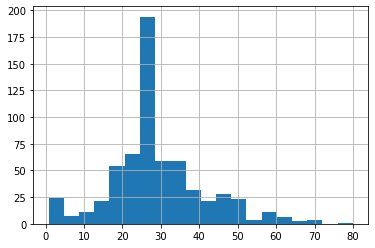

In [11]:
dftrain.age.hist(bins=20) #bins-increments of graphing

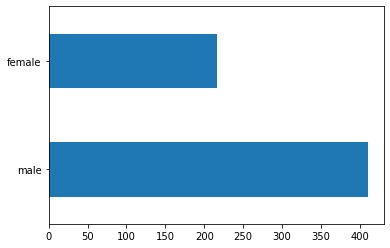

In [0]:
dftrain.sex.value_counts().plot(kind='barh')

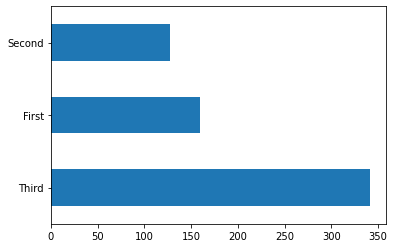

In [0]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

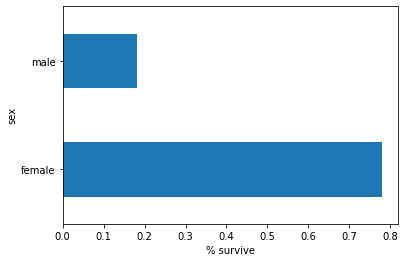

In [0]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

- Most passengers are in their 20's or 30's
- Most passengers are male
- Most passengers are in "Third" class
- Females have a much higher chance of survival

## Training vs Testing

**Training data** is what we feed to the model so that it can develop and learn.

**Testing data** is what we use to evaulate the model and see how well it is performing. 

In [0]:
# Categorize the data

**Categorical data** - non-numerical data that can be placed under a specified field
- Note: Categorical data can be represented by numbers to identify the categories they belong to. (ex: Male = 1, Female = 0)

**Numerical data** - data that's represented by numbers

In [12]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

In [13]:
dftrain['class'].unique() #.unique() gives all of the unique values withing the dataset (the names of the different data elements)

array(['Third', 'First', 'Second'], dtype=object)

In [14]:
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  #Create a column of feature names with the different associated vocabulary terms
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

### Training process 
*  Models must be fed the data in batches
* Batches are fed according to Epochs 
  * Epochs are how many times the model will see the same data. Feeding the data to the model in variations
  Note: Over feeding the model can harm the outcome so feed it a little at a time.
  

### Input Function for Linear Regression
The TensorFlow model we are going to use requires that the data we pass it comes in as a tf.data.Dataset object. This means we must create a **input function** that can **convert** our current **pandas dataframe into that object.**

In [0]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False) #num_epochs is 1 because we aren't training this dataset like the line above. Shuffle is False because we don't need to shuffle since we are testing it.

### Creating the Linear Regression Model

Here we will use a **linear estimator** utilize the linear regression algorithm.


In [0]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier through an estimator module

linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing data

clear_output()  # clears console output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model that tells the accuracy of it
#Accuracy - compares the dataset results with models predicted results to get the accuracy of the data
print(result)

0.75
{'accuracy': 0.75, 'accuracy_baseline': 0.625, 'auc': 0.8289561, 'auc_precision_recall': 0.76417667, 'average_loss': 0.5133544, 'label/mean': 0.375, 'loss': 0.5106846, 'precision': 0.6363636, 'prediction/mean': 0.45520076, 'recall': 0.7777778, 'global_step': 200}


### Predicting the data set with the model

How to make predictions for every point in the evaluation data set




In [0]:
#Check the predictions of the model
#Here we will turn the results into a list to get a dictionary of all points and predictions
result = list(linear_est.predict(eval_input_fn))
#print(result[0])
#Here are looking for the 'probabilities' dict because it will help us to see the probability that someone will survive or won't survive
#Look for this --> {'probabilities': array([0.9108078 (<--won't survive(0)) , 0.08919217 (<-- will survive(1))]}

#Here we will print the probability of survival (1)
print(result[0]['probabilities'][0]) #Format: [passenger/data point][data set dict][outcome (survival)]

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpti5yf2yb/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.9044733


To put this together we can evaluate the passengers' attributes to see if the prediction makes sense with the dfeval.loc[ ] method  

In [0]:
print(dfeval.loc[36])
print(y_eval.loc[36])
print(result[36]['probabilities'][1]) 
#This will give us the passengers details and their chance of survival and if they survived

sex                          male
age                          36.5
n_siblings_spouses              0
parch                           2
fare                           26
class                      Second
deck                            F
embark_town           Southampton
alone                           n
Name: 36, dtype: object
0
0.26806477


## Classification
Differentiating data points and separating them into classes. Predicting the probability that the data point is in specified classes. 

### Dataset
This specific dataset seperates flowers into 3 different classes of species.

* Setosa
* Versicolor
* Virginica

The information about each flower is the following.

* sepal length
* sepal width
* petal length
* petal width

In [0]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']
# Lets define some constants to help us later on

In [0]:
#Call in the data set
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
# Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [0]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [0]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [0]:
train.shape

(120, 4)

### Input Function for Classification

In [0]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffling and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)

# Feature columns describe how to use the input. We don't need the numerical of the previous input function because we're looking for the key values
my_feature_columns = []
#this code will loop through all of the keys in the dataset
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

SyntaxError: ignored

## Building the Classification Model

Here we will use the DNN Classifier (Deep Neural Network)

In [0]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

In [0]:
#Here we trained the model
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)
# We include a lambda to avoid creating an inner function previously

In [0]:
#Here we will evaluate the model
#We didn't specify the number of steps because during evaluation the model will only look at the testing data one time.
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

In [0]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))

In [0]:
print(pred_dict)

#Probability percentage tells you how likely the data point is to be classified as the key value predictions.
#Class ID tells you what value the prediction is from the original list.

## Clustering

**Clustering** is an *unsupervised learning algorithm*. It finds clusters of like data and tells you the location of the clusters. 

### Basic Algorithm for K-Means.
- Step 1: Randomly pick K points to place K centroids
  - **Centroids** are the base of a cluster and tells you where the needed cluster is.
- Step 2: Assign all the data points to the centroids by distance. The closest centroid to a point is the one it is assigned to.
- Step 3: Average all the points belonging to each centroid to find the middle of those clusters (center of mass). Place the corresponding centroids into that position.
- Step 4: Reassign every point once again to the closest centroid.
- Step 5: Repeat steps 3-4 until no point changes which centroid it belongs to.

## Hidden Markov Models
"The Hidden Markov Model is a finite set of states, each of which is associated with a (generally multidimensional) probability distribution []. Transitions among the states are governed by a set of probabilities called transition probabilities." (http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html)

A hidden markov model works with probabilities to predict future events or states. In this section we will learn how to create a hidden markov model that can predict the weather.

This section is based on the following TensorFlow tutorial. https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel

### Data
Let's start by discussing the type of data we use when we work with a hidden markov model.

In the previous sections we worked with large datasets of 100's of different entries. For a markov model we are only interested in probability distributions that have to do with states.

We can find these probabilities from large datasets or may already have these values. We'll run through an example in a second that should clear some things up, but let's discuss the components of a markov model.

**States**: In each markov model we have a finite set of states. These states could be something like "warm" and "cold" or "high" and "low" or even "red", "green" and "blue". These states are "hidden" within the model, which means we do not direcly observe them.

**Observations**: Each state has a particular outcome or observation associated with it based on a probability distribution. An example of this is the following: On a hot day Tim has a 80% chance of being happy and a 20% chance of being sad.

**Transitions**: Each state will have a probability defining the likelyhood of transitioning to a different state. An example is the following: a cold day has a 30% chance of being followed by a hot day and a 70% chance of being follwed by another cold day.

To create a hidden markov model we need.

- States
- Observation Distribution
- Transition Distribution


For our purpose we will assume we already have this information available as we attempt to predict the weather on a given day.

In [0]:
!pip install tensorflow_probability==0.8.0rc0 --user --upgrade

In [0]:
%tensorflow_version 2.x
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow as tf
import numpy as np


Here we coded a model for the following:

1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
5. On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.

**Standard deviation** gives us the range of values above or below the mean


In [0]:
#Here we create probability of distribution model
tfd = tfp.distributions  # making a shortcut for later on
#bracket probability representation - [Cold Day, Hot Day]
initial_distribution = tfd.Categorical(probs=[0.8, 0.2])  # Refer to point 2 above
transition_distribution = tfd.Categorical(probs=[[0.7, 0.3],
                                                 [0.2, 0.8]])  # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # insert standard deviation. Refer to point 5 above
#loc=[mean] scale=[standard deviation]
# the loc argument represents the mean and the scale is the standard devitation

In [0]:
#Here we use hidden Markov model
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7)

The number of steps represents the number of days that we would like to predict information for. In this case we've chosen 7, an entire week.

To get the expected temperatures on each day we can do the following.

In [0]:
mean = model.mean() #Partially defined tensor - This calculates the probablity so that we can run our probability distribution model

# due to the way TensorFlow works on a lower level we need to evaluate part of the graph
# from within a session to see the value of this tensor

# in the new version of tensorflow we need to use tf.compat.v1.Session() rather than just tf.Session()
with tf.compat.v1.Session() as sess:  
  print(mean.numpy())

The model and session combines gives the temperature on 7 days (the reason we input a 7 in the steps portion of the model

Note: temperature is in celsius

- [**Day 1:** 2.9999998 | **Day 2:** 5.9999995 | **Day 3:** 7.4999995 | **Day 4:** 8.25 | **Day 5:** 8.625001 | **Day 6:** 8.812501 | **Day 7:** 8.90625  ]